# Tutorial 20: Higher Dimensions in NumPy

## PHYS 2600

In [1]:
# Import cell

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## T20.1 - Up to higher dimensions

Let's begin working with some higher-dimensional arrays!

### Part A

The following 2-dimensional array contains a set of velocity measurements $(v_x, v_y, v_z)$.  


In [2]:
velo = np.array(
    [
        [2.7, 1.1, -0.4],
        [1.9, 1.9, 3.7],
        [-0.4, 0.0, -0.1],
        [1.5, -1.9, -2.7],
        [3.3, 0.4, 1.5],
        [7.1, -0.9, 1.3],
    ]
)

__Use two-dimensional indexing, masks, and slices to carry out the following operations:__

* Get the third $v_z$ measurement.

In [3]:
velo[2, 2]

np.float64(-0.1)

* Get the last three $v_x$ measurements as an array.

In [4]:
velo[3:, 0]

array([1.5, 3.3, 7.1])

* Get an array containing all rows where the speed in the $y$-direction is __negative__.  (There are two such rows.)

_(Hint: this requires a row mask!  Look back at the lecture notes to see how this works...)_

In [5]:
# Mask for rows where vy is negative
row_mask = velo[:, 1] < 0
print(row_mask)

# Use the mask on the array
velo[row_mask, :]

[False False False  True False  True]


array([[ 1.5, -1.9, -2.7],
       [ 7.1, -0.9,  1.3]])

### Part B

Use `reshape` and `arange` to make a grid of numbers from 1-100, with 10 numbers in each row - `print` it to see that you got it right!

In [6]:
### BEGIN SOLUTION
grid = np.arange(1, 101).reshape(10, 10)
print(grid)
### END SOLUTION

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]


Now, use a Boolean mask to set all __multiples of 2__ (even numbers) to 0.  

_(Hint: remember that `%` or `np.mod()` are what you want to test for multiples.  Remember that a mask has to be a Boolean array, explicitly; if you create an array of 0/1 instead of False/True, you'll get confusing results!)_



In [7]:
### BEGIN SOLUTION
grid[(grid % 2) == 0] = 0
### END SOLUTION

print(grid)

[[ 1  0  3  0  5  0  7  0  9  0]
 [11  0 13  0 15  0 17  0 19  0]
 [21  0 23  0 25  0 27  0 29  0]
 [31  0 33  0 35  0 37  0 39  0]
 [41  0 43  0 45  0 47  0 49  0]
 [51  0 53  0 55  0 57  0 59  0]
 [61  0 63  0 65  0 67  0 69  0]
 [71  0 73  0 75  0 77  0 79  0]
 [81  0 83  0 85  0 87  0 89  0]
 [91  0 93  0 95  0 97  0 99  0]]


In [8]:
## You should see all of the even numbers removed from `grid` in the print-out above!
## Here's an automatic test to make sure:

assert np.count_nonzero(np.logical_and(grid > 0, grid % 2 == 0) == 0)

Now do the same to all __multiples of 3__, __multiples of 5__, and __multiples of 7__.

In [9]:
### BEGIN SOLUTION
grid[(grid % 3) == 0] = 0
grid[(grid % 5) == 0] = 0
grid[(grid % 7) == 0] = 0
### END SOLUTION

print(grid)

[[ 1  0  0  0  0  0  0  0  0  0]
 [11  0 13  0  0  0 17  0 19  0]
 [ 0  0 23  0  0  0  0  0 29  0]
 [31  0  0  0  0  0 37  0  0  0]
 [41  0 43  0  0  0 47  0  0  0]
 [ 0  0 53  0  0  0  0  0 59  0]
 [61  0  0  0  0  0 67  0  0  0]
 [71  0 73  0  0  0  0  0 79  0]
 [ 0  0 83  0  0  0  0  0 89  0]
 [ 0  0  0  0  0  0 97  0  0  0]]


You should see from the printed grid that many of the numbers have been zeroed out; the first number remaining after 1 is 11, which is the next prime number in sequence after 2,3,5,7!

In fact, this is the start of a simple and ancient prime-number finding algorithm called the [__Sieve of Eratosthenes__](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes).  All of the numbers remaining in the grid above are prime numbers, since the first number we could try to cross out after $11$ would be $11^2 = 121$, which is greater than anything we have left.

(We didn't really need a two-dimensional array to apply the Sieve using Python, but if you're doing the algorithm by hand a grid like this is preferred - it makes it easier to spot patterns in the numbers that you're crossing out, e.g. all of the even columns disappeared when you removed multiples of 2.)

## T20.2 - Down to lower dimensions

Now let's do some reduction exercises!

### Part A

Use a mask with `np.sum()` or `np.count_nonzero()` to count how many numbers are greater than 100 in the array below.  You should find __24__ as your answer.

_(Note: Since_ `count_nonzero` _is more specialized, it tends to be faster than `sum`.  Otherwise, they accomplish  exactly the same task on a mask: finding how many `True` values there are.)_

In [10]:
a = np.array(
    [
        [
            32.64173429,
            191.85703207,
            28.07613219,
            93.6758794,
            137.11334151,
            98.49036171,
            16.21920297,
            73.11380953,
            198.45163689,
            95.30971938,
            105.18180757,
            58.69108781,
        ],
        [
            64.34112696,
            120.99784718,
            79.40494167,
            150.56049688,
            75.27558455,
            169.26085959,
            119.46765466,
            5.15243732,
            63.46223024,
            13.83497847,
            76.09363069,
            15.07392756,
        ],
        [
            98.81659688,
            127.66361968,
            25.18028895,
            1.80201359,
            41.11615739,
            22.39522975,
            76.92570925,
            45.42721332,
            9.30257269,
            103.4348637,
            159.5006543,
            52.82242142,
        ],
        [
            115.98655928,
            146.78847103,
            126.29624116,
            35.91681471,
            26.33847396,
            38.53213651,
            111.75034001,
            161.22160872,
            174.9432789,
            158.26168031,
            143.29047058,
            155.76391194,
        ],
        [
            31.40801211,
            62.97866379,
            95.74896593,
            22.0901773,
            58.7692522,
            90.20673554,
            183.78983523,
            198.26328673,
            137.14519089,
            194.93600581,
            71.14449439,
            65.56166131,
        ],
    ]
)

In [11]:
### BEGIN SOLUTION
gt_100 = np.count_nonzero(a > 100)
print(gt_100)

# Or just use sum:
print(np.sum(a > 100))
### END SOLUTION

24
24


In the last part, we ignored the two-dimensional structure of the array, and just asked about individual numbers.  Now let's try some more structured questions: 

1. __How many rows in `a` have an average greater than 100?__  (There should be 2.)
2. __How many columns in `a` have an average greater than 100?__  (There should be 5.)

_(Hint: use `np.mean()` to take the average, and the `axis=` keyword to do it over rows or columns.  The array `a` has 5 rows and 12 columns, so if you're not sure which axis is which, you can look at the size of the array of averages produced by `np.mean()`.)_

In [12]:
row_avg = np.mean(a, axis=1)  # Reduce axis 1 (columns), leaving axis 0 (rows)
print(len(row_avg))  # Should be 5 rows
print(np.sum(row_avg > 100))

col_avg = np.mean(a, axis=0)  # Reduce axis 0 (rows), leaving axis 1 (columns)
print(len(col_avg))  # Should be 12 columns
print(np.sum(col_avg > 100))

5
2
12
5


### Part B

Going back to the `velo` array from problem 1: use an array reduction to find the __total velocity vector__, 
$$
\vec{v} = \sum_i \vec{v}_i = \sum_i (v_{x,i}, v_{y,i}, v_{z,i}).
$$

Save your answer to the variable `v_tot`.  (Your result should be an array of length 3; I've given you the correct answer as a test case.)

In [13]:
# Sum over columns == collapse the row index, axis 0
v_tot = np.sum(velo, axis=0)
print(v_tot)

[16.1  0.6  3.3]


In [14]:
import numpy.testing as npt

npt.assert_allclose(v_tot, np.array([16.1, 0.6, 3.3]), atol=0.1)

Next, get an array from `velo` containing all rows where _all_ components of $v$ are __positive__.

_(Hint: this requires using the `np.all` reduction to create a mask, and then selecting from `velo` using that mask.)_

In [15]:
# Row mask using np.all to test if all entries are positive
pos_mask = np.all(velo > 0, axis=1)
print(pos_mask)

# Apply the mask
velo[pos_mask, :]

[False  True False False  True False]


array([[1.9, 1.9, 3.7],
       [3.3, 0.4, 1.5]])

One more exercise with `velo`: get an array containing all rows where the __speed__ $v = \sqrt{v_x^2 + v_y^2 + v_z^2}$ is greater than 3.0 m/s.  There should be four such rows.

_(Hint: once again, you're creating a mask.  Since the formula for speed includes a sum, using `np.sum()` with the appropriate axis is recommended here.)_

In [16]:
speed = np.sqrt(np.sum(velo**2, axis=1))
print(speed)
speed_mask = speed > 3.0

# Apply the mask
velo[speed_mask, :]

[2.94278779 4.57274535 0.41231056 3.62629287 3.64691651 7.27392604]


array([[ 1.9,  1.9,  3.7],
       [ 1.5, -1.9, -2.7],
       [ 3.3,  0.4,  1.5],
       [ 7.1, -0.9,  1.3]])

## T20.3 - Rolling the dice


Let's go back to random numbers to see another application of higher-dimensional arrays.  Consider the random distribution of results obtains by rolling pairs of six-sided dice and taking the sum:

<a href="https://math.stackexchange.com/questions/1204396/why-is-the-sum-of-the-rolls-of-two-dices-a-binomial-distribution-what-is-define" target="_blank"><img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/dice_histogram.png" width=400px /></a>

Even though the distribution of numbers 1-6 for a single die is uniform, we end up with a triangular-shaped distribution for the sum.  As shown in the plot above, this is simple combinatorics: there are many ways to make 7 by adding two dice, but only one way to make 2 or 12.  The distribution should be peaked at 7 and symmetric on both sides.

### Part A

Let's reproduce this result in Python - representing pairs of dice rolls is a good use case for a two-dimensional array!  Using `np.random.randint()`, __create an array called `rolls`__ containing 10,000 random pairs of integers between 1 and 6 (inclusive.)  Then use `np.sum` to __create an array called `sums`__ which contains the sum of each pair of integers.  (The `sums` array will give us the distribution of fair rolls for a pair of six-sided dice.) 

_(Hint: `rolls` should have 2 rows and 10,000 columns, which you can get directly from `np.random.randint` with the `size=...` keyword.  Giving size a tuple of numbers will create a higher-dimensional array of that shape.  To create sums, you'll need the `axis=...` keyword, since just calling `np.sum(rolls)` will add everything up and leave you with one number!)_



In [24]:
rolls = np.random.randint(1, 7, size=(2, 10000))
sums = np.sum(rolls, axis=0)

array([[1, 4, 3, ..., 6, 2, 4],
       [5, 4, 2, ..., 6, 6, 6]], shape=(2, 10000))

In [18]:
assert rolls.shape == (2, 10000)
assert sums.shape == (10000,)

Now we'd like to plot the distribution of `sums`. Your first instinct is probably to use `plt.hist()`, but it turns out that you have to be a little careful with how the histogram bins work, since our dice rolls are all exactly integers.  So, I'm going to ask you to do the same plot _two ways:_

1. __Use the function `np.unique()` with argument `return_counts=True`__: this will return a tuple of 2 arrays - the first is the unique values in `sums` (which is every number from 2 to 12) and the second is the number of counts of each value.  You can plug these two arrays into `plt.plot` - I suggest using a marker like `marker='s'` so you can see the discrete points being plotted.

2. __Use `plt.hist` on `sums` directly__, but make sure you pick the right number of bins (specified by the `bins=...` argument.)  You should have the same number of bins as possible outcomes!

Plot these both in the same cell: they should agree with each other, and they should both look like the ideal triangular distribution shown above, but common mistakes with `plt.hist` will show up plainly if it disagrees with the `np.unique()` approach.


(array([ 264.,  543.,  816., 1150., 1443., 1635., 1418., 1090.,  819.,
         564.,  258.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

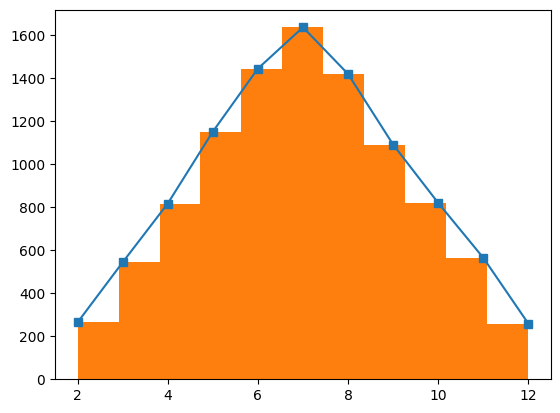

In [19]:
unique_sums, counts = np.unique(sums, return_counts=True)
plt.plot(unique_sums, counts, marker="s")

plt.hist(sums, bins=11)

### Part B

A common task with random numbers is __random sampling__, where we have some list of values and we want to choose sets of them randomly.  We could use `randint` to index the list, but this problem is so common that NumPy gives us a function to do it, `np.random.choice()`.

Create a list of possible outcomes for rolling one die, and then __use `np.random.choice` with the `size=` keyword argument__ to repeat what you did in part A, i.e. drawing 10,000 random rolls of a pair of dice and then creating the array of their sums.  __Copy/paste one of your plotting routines from above__ to visualize the result and make sure you're getting the same distribution.

(array([ 302.,  584.,  837., 1039., 1465., 1609., 1419., 1109.,  800.,
         550.,  286.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

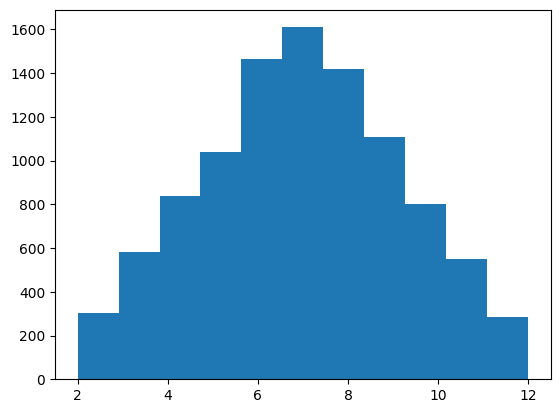

In [20]:
die_list = [1, 2, 3, 4, 5, 6]

rolls = np.random.choice(die_list, size=(2, 10000))
sums = np.sum(rolls, axis=0)
plt.hist(sums, bins=11)

### Part C

What does the distribution look like for rolling __three__ six-sided dice at once?  __Ten__ dice?  (You'll need to be careful with how you adjust your bins to get a nice-looking distribution - especially for the case of ten dice, because the odds of actually rolling ten 1s at the same time are very low...)

(array([  1.,   1.,   0.,   3.,   3.,   6.,  17.,  26.,  42.,  74.,  99.,
        140., 196., 244., 320., 412., 457., 532., 619., 683., 731., 704.,
        731., 675., 629., 523., 514., 414., 327., 271., 202., 151.,  97.,
         79.,  38.,  16.,  10.,   7.,   5.,   1.]),
 array([14.   , 14.975, 15.95 , 16.925, 17.9  , 18.875, 19.85 , 20.825,
        21.8  , 22.775, 23.75 , 24.725, 25.7  , 26.675, 27.65 , 28.625,
        29.6  , 30.575, 31.55 , 32.525, 33.5  , 34.475, 35.45 , 36.425,
        37.4  , 38.375, 39.35 , 40.325, 41.3  , 42.275, 43.25 , 44.225,
        45.2  , 46.175, 47.15 , 48.125, 49.1  , 50.075, 51.05 , 52.025,
        53.   ]),
 <BarContainer object of 40 artists>)

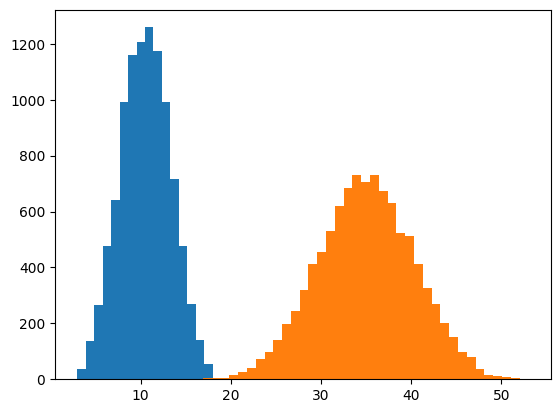

In [21]:
rolls_3 = np.random.choice(die_list, size=(3, 10000))
rolls_10 = np.random.choice(die_list, size=(10, 10000))

sums_3 = np.sum(rolls_3, axis=0)
sums_10 = np.sum(rolls_10, axis=0)

plt.hist(sums_3, bins=18 - 3 + 1)
plt.hist(sums_10, bins=np.max(sums_10) - np.min(sums_10) + 1)

### Part D (optional challenge)

Certain board or role-playing games sometimes call for the use of a 100-sided die (also known as a "d100".)  If you've ever seen a d100, you know they're large and somewhat impractical!  The largest common dice that are used for games are 20-sided dice ("d20".)

To replace a d100, you could instead roll __five 20-sided dice__ ("5d20".)  Simulate the results - how different would this distribution be from a uniform distribution from 1-100, which the d100 provides?  What if you rolled __two 10-sided dice__, multiplied the result of one of them by 10, and added them together - is that a better approximation to a single d100?

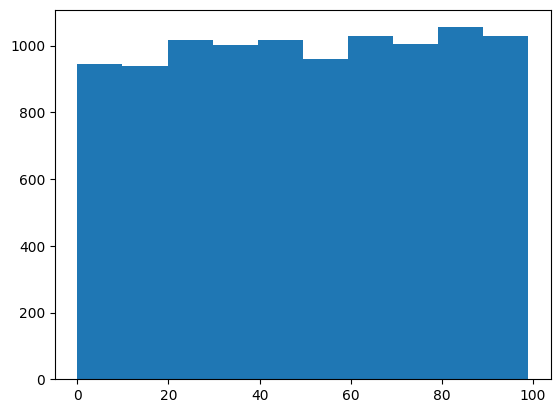

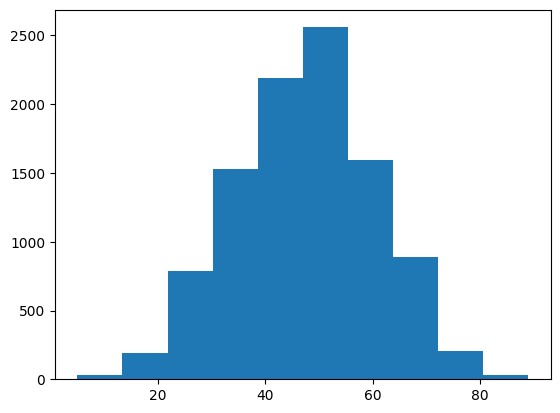

(array([1002.,  995.,  990., 1018.,  970., 1004., 1024., 1037.,  965.,
         995.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

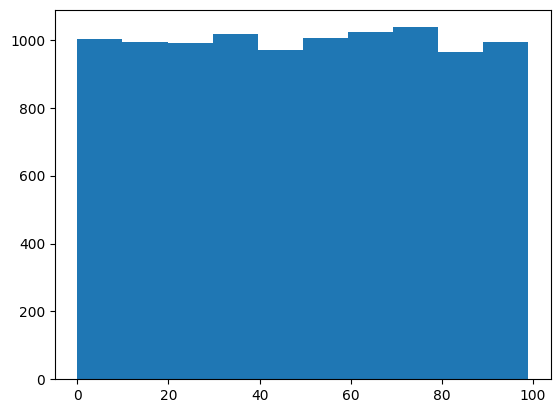

In [22]:
# One d100 is a uniform distribution
rolls_d100 = np.random.choice(np.arange(100), size=10000)
plt.hist(rolls_d100)
plt.show()


# 5d20 gives a fairly triangular distribution, peaked near 50 - very different from d100!
rolls_5d20 = np.random.choice(np.arange(20), size=(5, 10000))
sums_5d20 = np.sum(rolls_5d20, axis=0)
plt.hist(sums_5d20)
plt.show()

# 1d10 + 10*1d10 also gives a uniform distribution!
rolls_2d10 = np.random.choice(np.arange(10), size=(2, 10000))
sums_2d10 = rolls_2d10[0, :] + rolls_2d10[1, :] * 10
plt.hist(sums_2d10)